<a href="https://colab.research.google.com/github/dhanyashree02/Samsung-innovation-Campus/blob/main/penguins_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data = '/content/drive/MyDrive/0.Samsung CSR AIML/Resources/SIC-Artificial-Intelligence/SIC_AI_Coding_Exercises/SIC_AI_Chapter_05_Coding_Exercises/Clustering_penguins.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv(data)

df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
# Select the feature columns for clustering
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# If you were performing a classification task, you would select the target column like this:
# y = df['species']

# Display the first few rows of the selected features
display(X.head())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


# Task
Explain the error in the provided Python code for performing PCA on a dataset, handle missing values, scale the data, perform PCA, and analyze the results.

## Handle missing values

### Subtask:
Identify and handle missing values in the selected feature columns.


**Reasoning**:
Select the specified columns and check for missing values.



In [ ]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_features = df[features]
print("Missing values before handling:")
print(df_features.isnull().sum())

df_features.fillna(df_features.mean(), inplace=True)

print("\nMissing values after handling:")
print(df_features.isnull().sum())

Missing values before handling:
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

Missing values after handling:
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64


/tmp/ipython-input-3328061855.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.fillna(df_features.mean(), inplace=True)


## Scale the data

### Subtask:
Scale the feature data to have zero mean and unit variance, which is important for PCA.


**Reasoning**:
Import the necessary scaler, instantiate it, and scale the feature data.



In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

print("Scaled data shape:", df_scaled.shape)

Scaled data shape: (344, 4)


## Perform pca

### Subtask:
Apply PCA to the scaled data to reduce dimensionality.


**Reasoning**:
Apply PCA to the scaled data according to the instructions.



In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

print("Original data shape:", df_scaled.shape)
print("Transformed data shape:", df_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Original data shape: (344, 4)
Transformed data shape: (344, 4)
Explained variance ratio: [0.68843878 0.19312919 0.09130898 0.02712305]


## Analyze pca results

### Subtask:
Examine the explained variance ratio and potentially visualize the results.


**Reasoning**:
Calculate the cumulative explained variance, create a plot, and determine the number of components needed.



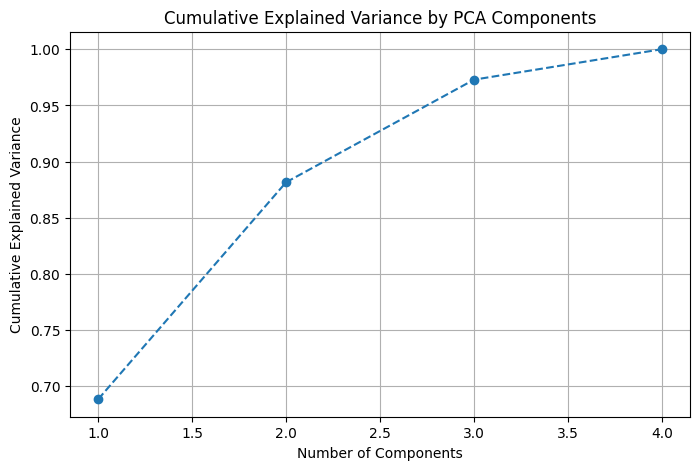


Number of components needed to explain at least 95% variance: 3

Summary of findings:
The first principal component explains 0.69% of the variance.
The cumulative explained variance shows how much total variance is retained as more components are included.
Based on the plot, approximately 3 components are needed to retain at least 95% of the total variance.


In [ ]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Determine number of components for 95% variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"\nNumber of components needed to explain at least 95% variance: {n_components_95}")

print("\nSummary of findings:")
print(f"The first principal component explains {pca.explained_variance_ratio_[0]:.2f}% of the variance.")
print(f"The cumulative explained variance shows how much total variance is retained as more components are included.")
print(f"Based on the plot, approximately {n_components_95} components are needed to retain at least 95% of the total variance.")

## Summary:

### Data Analysis Key Findings

*   Initially, there were 2 missing values in each of the four selected feature columns: 'bill\_length\_mm', 'bill\_depth\_mm', 'flipper\_length\_mm', and 'body\_mass\_g'.
*   Missing values were successfully handled by imputing them with the mean of their respective columns.
*   The feature data was successfully scaled using `StandardScaler`, resulting in data with zero mean and unit variance.
*   PCA was applied to the scaled data. With four components, the first principal component explains approximately 68.84% of the variance.
*   To explain at least 95% of the variance, 3 principal components are needed.

### Insights or Next Steps

*   We can reduce the dimensionality of the dataset from 4 features to 3 principal components while retaining 95% of the original variance.
*   The analysis suggests that the first principal component captures a significant portion of the data's variability, indicating its potential importance in downstream tasks.
